### **Compare between signle name datasets and whole dataset**

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
project_dir = "/home/jupyter-tfg2425paula/prediction_project_v3"
os.chdir(project_dir)

clean_data_dir = os.path.join(project_dir, "00_data/clean")
horizontal_data_dir = os.path.join(project_dir, "00_data/horizontal_structure")
results_dir = os.path.join(project_dir, "02_results")
plots_dir = os.path.join(project_dir, "03_plots")
pca_data_dir = os.path.join(project_dir, "00_data/pca")

In [4]:
df = pd.read_csv(os.path.join(results_dir, "combined_vs_individual_v1/combined_total_data.csv"), sep=";", decimal=",")
df

,type,security_type,window_size,model_type,iteration,accuracy_nonzero,loss_decrease_percentage,final_train_loss
0,combined,options,5,lstm,1,0.546667,-59.247152,0.283137
1,combined,options,5,lstm,2,0.530000,-64.945246,0.243514
2,combined,options,5,lstm,3,0.523333,-58.206111,0.290256
3,combined,options,5,lstm,4,0.523333,-62.317039,0.261980
4,combined,options,5,lstm,5,0.543333,-55.698727,0.307850
...,...,...,...,...,...,...,...,...
235,SPX,technical,100,gru,1,0.487603,-41.276465,0.412947
236,SPX,technical,100,gru,2,0.520661,-47.429202,0.369651
237,SPX,technical,100,gru,3,0.487603,-31.585481,0.478975
238,SPX,technical,100,gru,4,0.504132,-35.879150,0.450019


In [7]:
df['Precisión'] = pd.to_numeric(df['accuracy_nonzero'], errors='coerce')

df_combined = df[df['type'] == 'combined']
df_other = df[df['type'] != 'combined']

# Define aggregation functions
agg_funcs = {
    'Precisión': ['mean', 'min', 'max', 'std']
}

summary_combined = df_combined.groupby(['security_type', 'window_size', 'model_type']).agg(agg_funcs).reset_index()
summary_combined.columns = ['security_type', 'window_size', 'model_type', 'avg_accuracy', 'min_accuracy', 'max_accuracy', 'std_accuracy']
summary_combined

,security_type,window_size,model_type,avg_accuracy,min_accuracy,max_accuracy,std_accuracy
0,options,5,gru,0.589333,0.540000,0.620000,0.031127
1,options,5,lstm,0.533333,0.523333,0.546667,0.011055
2,options,10,gru,0.542667,0.476667,0.586667,0.048270
3,options,10,lstm,0.533333,0.506667,0.550000,0.019003
4,options,50,gru,0.490000,0.450000,0.556667,0.041164
5,options,50,lstm,0.518000,0.500000,0.553333,0.021292
6,options,100,gru,0.463333,0.416667,0.506667,0.037118
7,options,100,lstm,0.493333,0.466667,0.533333,0.024944
8,single_name,5,gru,0.534000,0.513333,0.546667,0.013208
9,single_name,5,lstm,0.520667,0.493333,0.573333,0.031038


In [32]:
summary_combined_sorted = summary_combined.sort_values(by='avg_accuracy', ascending=False)

summary_combined_technical = summary_combined_sorted[summary_combined_sorted['security_type'] == "technical"]

summary_combined_technical

,security_type,window_size,model_type,avg_accuracy,min_accuracy,max_accuracy,std_accuracy
16,technical,5,gru,0.980,0.98,0.98,0.000000
20,technical,50,gru,0.974,0.96,0.98,0.008944
18,technical,10,gru,0.958,0.87,0.98,0.049193
22,technical,100,gru,0.742,0.27,0.97,0.275173
17,technical,5,lstm,0.606,0.56,0.67,0.051284
19,technical,10,lstm,0.600,0.56,0.64,0.033912
21,technical,50,lstm,0.498,0.41,0.57,0.061400
23,technical,100,lstm,0.478,0.38,0.56,0.073280


In [7]:
summary_st = df_combined.groupby(['security_type', 'model_type']).agg(agg_funcs).reset_index()
summary_st.columns = ['security_type','model_type', 'avg_accuracy', 'min_accuracy', 'max_accuracy', 'std_accuracy']
summary_st

,security_type,model_type,avg_accuracy,min_accuracy,max_accuracy,std_accuracy
0,options,gru,0.557500,0.530000,0.600000,0.023592
1,options,lstm,0.574500,0.510000,0.640000,0.038454
2,single_name,gru,0.577500,0.510000,0.660000,0.050667
3,single_name,lstm,0.580500,0.500000,0.680000,0.055675
4,technical,gru,0.521968,0.480992,0.564388,0.019473
5,technical,lstm,0.606809,0.531002,0.689256,0.054948


In [5]:
summary_model = df_combined.groupby(['security_type', 'model_type']).agg(agg_funcs).reset_index()
summary_model.columns = ['security_type','model_type', 'avg_accuracy', 'min_accuracy', 'max_accuracy']
summary_model

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [27]:
summary_other = df_other.groupby(['security_type','model_type']).agg(agg_funcs).reset_index()
summary_other.columns = ['security_type', 'model_type','avg_accuracy', 'min_accuracy', 'max_accuracy', 'std_accuracy']
summary_other

,security_type,model_type,avg_accuracy,min_accuracy,max_accuracy,std_accuracy
0,options,GRU,0.586,0.57,0.59,0.008944
1,options,LSTM,0.530,0.44,0.63,0.070711
2,single_name,GRU,0.542,0.52,0.56,0.014832
3,single_name,LSTM,0.544,0.51,0.59,0.034351
4,technical,GRU,0.534,0.47,0.57,0.039115
5,technical,LSTM,0.522,0.48,0.56,0.037683


### **Generate histograms**

In [16]:
df1 = pd.read_csv(os.path.join(results_dir, "best_models/combined_5_options_gru.csv"))
df2 = pd.read_csv(os.path.join(results_dir, "best_models/SPX_5_technical_lstm.csv"))

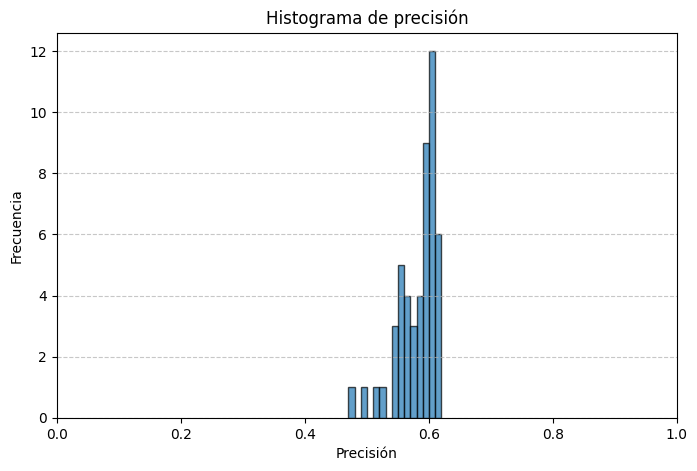

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df1['accuracy_nonzero'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')
plt.title('Histograma de precisión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 1)

# Show the plot
plt.show()

In [19]:
histogram(df1['accuracy_nonzero'])

NameError: name 'histogram' is not defined